## NLP Course Work 
Individual Submission 

Name - Kowshik Kesavarapu                   
    
Group - 1   

### Named Entity Recognition 

Named Entity Recognition can be done in several different ways , I mainly want to explore how a prebuilt model like Spacy or NLTK works and how they may differ from trainig our own machine learning model like Perceptron, Multi layer Perceptron , CNN and several other works. 

The main objective for me is to figure out the best approach and also find and explore different models and data sets.

Named Entity can be defined as the word which has significant value . One way describe it is it's "Noun" in a sentance . It can be name of a person , Name of a city , Date , Organization name, Amount and much more.


Some of the most common Named Entities are 


| Entity Type | Description |Example|
| --- | --- |---|
|PERSON|Name of a person (Usually recognized as first name and last name|Kowshik Kesavarapu|
|NORP|Nationalities or Religious/Political Groups|India , UK|
|FAC|Facility Name |IFH , CERN |
|ORG|Organization Name |WHO|
|GPE|Geopolitical Entity|UN|
|LOC|location|Guildford|
|PRODUCT|Product Name |Google Pixel|
|EVENT|Event Name |Google I/O|
|WORK OF ART|Work of art|Picaso|
|LAW|A law that has been published|US Act XXXX|
|LANGUAGE|Language Name |Telugu , English|
|DATE|Date , I dosen't have to be exact date terms like yesterday are also comes under this |21/04/2002 , Tuesday|
|TIME|Time , It also usually considers terms like Afternoon , Evening|2:00PM . Tonight |
|PERCENT|Percentage|100|
|MONEY|Money|$100
|QUANTITY|Measurements of weight or distance|10 Kms|
|CARDINAL|A number, similar to quantity but not a measurement|25 Books (here 25 is Cardinal) |
|ORDINAL|A number, but signifying a relative position such as “first” or “second|First prize |

## NER Using Spacy 

Considering an example to try different Methods 

This sentance has 4 Named Entities 
1) European - Country 
2) Google - Organization 
3) $5.1 billion - Money
4) Wednesday - Date 

In [42]:
ex = 'World Health Organisation is spending $100 Million dollars to help with corona virus vacccination is African Countries'

In [43]:
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [51]:
doc = nlp(ex)
 
for ent in doc.ents:
    print(ent.text, ent.label_)

World Health Organisation ORG
$100 Million dollars MONEY
African NORP


This particular method is very intuitive and relatively easy to implement , We dont need to worry about Tokenization or any other pre processing , This works relatively well. But here we can see that the Spacy was not able to find money ($5.1 billion). And also one may argue that Phone is also a named entity as it was a product . Now lets see how NLTK Handels the same example 

### NER using NLTK

For NLTK we need tokenize and also tag POS using the pos_tag in nltk 

These tags are genrated using Penn Treebank Project.


The full forms of these tags are 

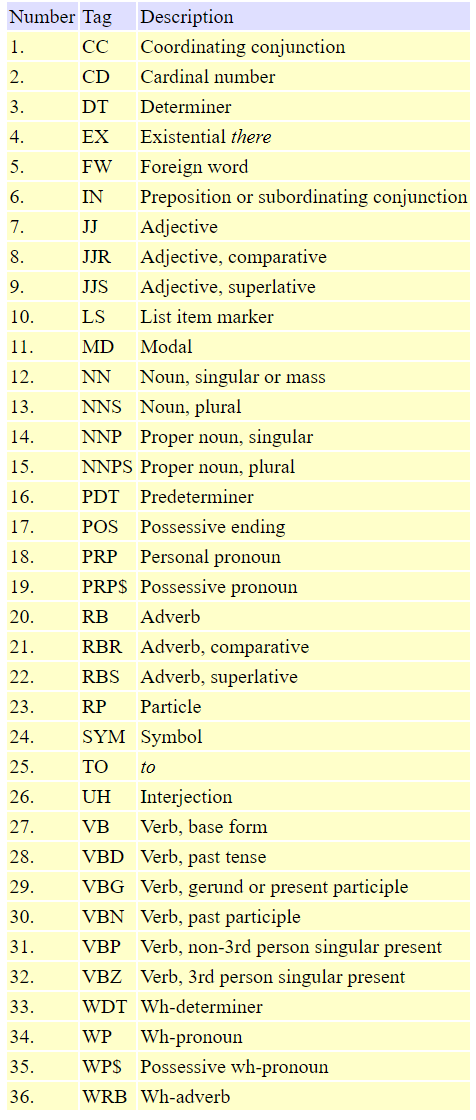


"Reference - https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html"

Once the sentance is Tokenized we can perform NER , I wrote a simple function to do all this when passed with the sentance 

We can perfoem NER and here we can see that 

Here we can see the sentance splitted and POS tagged 

In [45]:
import nltk
tokenized = nltk.word_tokenize(ex)#Tokenizing 
pos_tagged = nltk.pos_tag(tokenized)#Tagging POS 
print(pos_tagged)

[('World', 'NNP'), ('Health', 'NNP'), ('Organisation', 'NNP'), ('is', 'VBZ'), ('spending', 'VBG'), ('$', '$'), ('100', 'CD'), ('Million', 'NNP'), ('dollars', 'NNS'), ('to', 'TO'), ('help', 'VB'), ('with', 'IN'), ('corona', 'JJ'), ('virus', 'NN'), ('vacccination', 'NN'), ('is', 'VBZ'), ('African', 'JJ'), ('Countries', 'NNS')]


In [46]:
def ner_nltk(sent):
    tokenized = nltk.word_tokenize(ex)#Tokeni       zing 
    pos_tagged = nltk.pos_tag(tokenized)#Tagging POS 
    chunks = nltk.ne_chunk(pos_tagged)#Performing NER
    for chunk in chunks:
        if hasattr(chunk, 'label'):
            print(chunk)

In [53]:
chunks = nltk.ne_chunk(sentences[0])#Performing NER
for chunk in chunks:
        if hasattr(chunk, 'label'):
            print(chunk)

(GPE London/NNP/B-geo)
(GPE Iraq/NNP/B-geo)
(GPE British/JJ/B-gpe)


In [54]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [49]:
ner_nltk(sentences[0])

(GPE African/JJ)


Here we can see that the NLTK havent performed well and was only able to find two entities. Although this seems to be not at all scientific way to compare from my research i found that Spacy often performs well than NLTK as it was trained on much larger data set.

Now there is also a another way of getting the NER this is by using The Text API which is a Text analysis model. 

In [41]:
import requests
import json
text = "World Health Organisation is spending $100 Million dollars to help with corona virus vacccination is African Countries"
headers = {
    "Content-Type": "application/json",
    "apikey": '6d8398eb-dd38-4e39-b28f-8ce00ff9c4d3'
}
body = {
    "text": text
}
url = "https://app.thetextapi.com/text/ner"
 
response = requests.post(url, headers=headers, json=body)
ner = json.loads(response.text)["ner"]
print(ner)

[['ORG', 'World Health Organisation'], ['MONEY', '$100 Million dollars']]


This is another way but this model was sucessfull in finding the Money but missed the European Union 

Now that we covered three different relatively straight forward ways to do NER , Now i am going to experiment with building my own model by training using the ner_dataset , Which contains the data of several thousand sentances along with their POS and NER tags.

### Building the model using SKlearn 

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('ner_dataset.csv', encoding = "ISO-8859-1")
df = df[:100000]
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [10]:
#Doing some data cleaning 
df = df.fillna(method='ffill')

In [11]:
df['Sentence #'].nunique(), df.Word.nunique(), df.Tag.nunique()

(4544, 10922, 17)

So we have 4544 sentances. with 10922 words and 17 Tags 

Lets see what the tags are 

In [12]:
df.groupby('Tag').size().reset_index(name='counts')

,Tag,counts
0,B-art,75
1,B-eve,53
2,B-geo,3303
3,B-gpe,1740
4,B-nat,30
5,B-org,1876
6,B-per,1668
7,B-tim,1823
8,I-art,43
9,I-eve,47


In [13]:
X = df.drop('Tag', axis=1)
X.head()

,Sentence #,Word,POS
0,Sentence: 1,Thousands,NNS
1,Sentence: 1,of,IN
2,Sentence: 1,demonstrators,NNS
3,Sentence: 1,have,VBP
4,Sentence: 1,marched,VBN


In [14]:
v = DictVectorizer(sparse=False)
X = v.fit_transform(X.to_dict('records'))
y = df.Tag.values

In [15]:
classes = np.unique(y)
classes = classes.tolist()
classes

['B-art',
 'B-eve',
 'B-geo',
 'B-gpe',
 'B-nat',
 'B-org',
 'B-per',
 'B-tim',
 'I-art',
 'I-eve',
 'I-geo',
 'I-gpe',
 'I-nat',
 'I-org',
 'I-per',
 'I-tim',
 'O']

In [16]:
new_classes = classes.copy()
new_classes.pop()

'O'

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

In [18]:
per = Perceptron(verbose=10, n_jobs=-1, max_iter=5)
per.partial_fit(X_train, y_train, classes)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1

Norm: 11.53, NNZs: 113, Bias: -3.000000, T: 67000, Avg. loss: 0.001060
Total training time: 4.41 seconds.
-- Epoch 1
Norm: 8.43, NNZs: 57, Bias: -3.000000, T: 67000, Avg. loss: 0.000567
Total training time: 4.45 seconds.
-- Epoch 1
Norm: 13.42, NNZs: 162, Bias: -4.000000, T: 67000, Avg. loss: 0.001642
Total training time: 4.52 seconds.
-- Epoch 1
Norm: 48.83, NNZs: 1578, Bias: -4.000000, T: 67000, Avg. loss: 0.022328
Total training time: 4.52 seconds.


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   4 out of  17 | elapsed:    4.8s remaining:   15.9s
[Parallel(n_jobs=-1)]: Done   6 out of  17 | elapsed:    4.9s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done   8 out of  17 | elapsed:    4.9s remaining:    5.5s


-- Epoch 1
Norm: 56.87, NNZs: 2044, Bias: -4.000000, T: 67000, Avg. loss: 0.034970
Total training time: 4.59 seconds.
Norm: 68.07, NNZs: 2642, Bias: -4.000000, T: 67000, Avg. loss: 0.041776
Total training time: 4.62 seconds.
-- Epoch 1
Norm: 49.90, NNZs: 1337, Bias: -4.000000, T: 67000, Avg. loss: 0.015328
-- Epoch 1
Total training time: 4.64 seconds.
Norm: 44.41, NNZs: 1127, Bias: -4.000000, T: 67000, Avg. loss: 0.017164
Total training time: 4.59 seconds.
-- Epoch 1
-- Epoch 1
Norm: 6.24, NNZs: 31, Bias: -3.000000, T: 67000, Avg. loss: 0.000209
Total training time: 4.26 seconds.
Norm: 10.44, NNZs: 106, Bias: -3.000000, T: 67000, Avg. loss: 0.001060
Total training time: 4.47 seconds.
-- Epoch 1
Norm: 11.00, NNZs: 102, Bias: -3.000000, T: 67000, Avg. loss: 0.001209
Total training time: 4.30 seconds.
Norm: 11.45, NNZs: 96, Bias: -3.000000, T: 67000, Avg. loss: 0.000776
Total training time: 4.42 seconds.
Norm: 35.13, NNZs: 803, Bias: -4.000000, T: 67000, Avg. loss: 0.011149
Total training

[Parallel(n_jobs=-1)]: Done  10 out of  17 | elapsed:    9.1s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    9.1s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:    9.3s remaining:    1.9s


Norm: 30.53, NNZs: 672, Bias: -4.000000, T: 67000, Avg. loss: 0.012030
Total training time: 4.44 seconds.
Norm: 60.35, NNZs: 2091, Bias: -6.000000, T: 67000, Avg. loss: 0.026940
Total training time: 4.53 seconds.
Norm: 73.89, NNZs: 2851, Bias: 4.000000, T: 67000, Avg. loss: 0.048866
Total training time: 2.43 seconds.


[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   11.6s finished


Perceptron(max_iter=5, n_jobs=-1, verbose=10)

In [19]:
print(classification_report(y_pred=per.predict(X_test), y_true=y_test, labels=new_classes))
print('Accuracy Score on Train data:', accuracy_score(y_true=y_train, y_pred=per.predict(X_train)))
print('Accuracy Score on Test data:', accuracy_score(y_true=y_test, y_pred=per.predict(X_test)))

              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        24
       B-eve       0.11      0.05      0.07        19
       B-geo       0.56      0.81      0.66      1085
       B-gpe       0.92      0.78      0.84       556
       B-nat       1.00      0.17      0.29        12
       B-org       0.39      0.52      0.44       589
       B-per       0.70      0.46      0.56       564
       B-tim       0.91      0.63      0.75       611
       I-art       0.00      0.00      0.00        12
       I-eve       0.67      0.22      0.33        18
       I-geo       0.75      0.42      0.54       230
       I-gpe       1.00      0.07      0.13        14
       I-nat       0.50      0.50      0.50         2
       I-org       0.48      0.50      0.49       445
       I-per       0.83      0.13      0.22       591
       I-tim       0.36      0.18      0.24       194

   micro avg       0.61      0.54      0.58      4966
   macro avg       0.57   

### Linear classifiers with SGD training

In [20]:
sgd = SGDClassifier()
sgd.partial_fit(X_train, y_train, classes)
print(classification_report(y_pred=sgd.predict(X_test), y_true=y_test, labels=new_classes))
print('Accuracy Score on Train data:', accuracy_score(y_true=y_train, y_pred=sgd.predict(X_train)))
print('Accuracy Score on Test data:', accuracy_score(y_true=y_test, y_pred=sgd.predict(X_test)))

              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        24
       B-eve       0.00      0.00      0.00        19
       B-geo       0.41      0.95      0.57      1085
       B-gpe       0.96      0.62      0.76       556
       B-nat       0.00      0.00      0.00        12
       B-org       0.72      0.33      0.45       589
       B-per       0.93      0.34      0.50       564
       B-tim       0.91      0.66      0.76       611
       I-art       0.00      0.00      0.00        12
       I-eve       0.00      0.00      0.00        18
       I-geo       0.80      0.33      0.46       230
       I-gpe       0.80      0.29      0.42        14
       I-nat       0.00      0.00      0.00         2
       I-org       0.77      0.31      0.44       445
       I-per       0.73      0.44      0.55       591
       I-tim       1.00      0.02      0.03       194

   micro avg       0.59      0.53      0.56      4966
   macro avg       0.50   

### Naive Bayes classifier for multinomial models

In [21]:
nb = MultinomialNB(alpha=0.01)
nb.partial_fit(X_train, y_train, classes)
print(classification_report(y_pred=nb.predict(X_test), y_true=y_test, labels = new_classes))
print('Accuracy Score on Train data:', accuracy_score(y_true=y_train, y_pred=nb.predict(X_train)))
print('Accuracy Score on Test data:', accuracy_score(y_true=y_test, y_pred=nb.predict(X_test)))

              precision    recall  f1-score   support

       B-art       0.06      0.17      0.09        24
       B-eve       0.33      0.37      0.35        19
       B-geo       0.70      0.63      0.66      1085
       B-gpe       0.70      0.83      0.76       556
       B-nat       0.35      0.50      0.41        12
       B-org       0.41      0.44      0.43       589
       B-per       0.44      0.47      0.46       564
       B-tim       0.56      0.61      0.59       611
       I-art       0.07      0.08      0.08        12
       I-eve       0.46      0.33      0.39        18
       I-geo       0.40      0.52      0.46       230
       I-gpe       0.13      0.14      0.14        14
       I-nat       0.00      0.00      0.00         2
       I-org       0.50      0.51      0.51       445
       I-per       0.53      0.50      0.51       591
       I-tim       0.17      0.27      0.21       194

   micro avg       0.52      0.56      0.54      4966
   macro avg       0.36   

### Using Bidirectional LSTM 

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('ner_dataset.csv', encoding='latin1')
df = df.fillna(method='ffill')
df.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


### Retrieve sentences and corresponding tags

In [24]:
class SentenceGetter(object):
    def __init__(self, df):
        self.n_sent = 1
        self.df = df
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s['Word'].values.tolist(),
                                                          s['POS'].values.tolist(),
                                                          s['Tag'].values.tolist())]
        self.grouped = self.df.groupby('Sentence #').apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [25]:
getter = SentenceGetter(df)
sentences = getter.sentences

In [61]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

### Define mappings between sentences and tags

In [27]:
words = list(set(df['Word'].values))
words.append('ENDPAD')
num_words = len(words)
tags = list(set(df['Tag'].values))
num_tags = len(tags)
word2idx = {w: i+1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

### Padding input sentences and creating train/test split

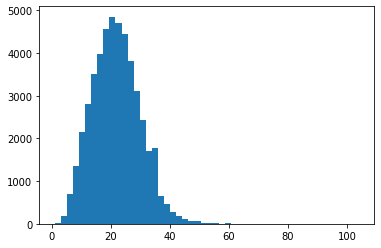

In [28]:
plt.hist([len(s) for s in sentences], bins=50)
plt.show();

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

max_len = 50
X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen = max_len, sequences = X, padding='post', value=num_words-1)

y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen = max_len, sequences = y, padding = 'post', value = tag2idx['O'])
y = [to_categorical(i, num_classes=num_tags) for i in y]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

### Build and compile a Bidirectional LSTM model

In [31]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [32]:
input_word = Input(shape=(max_len, ))
model = Embedding(input_dim = num_words, output_dim = max_len, input_length = max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation='softmax'))(model)
model = Model(input_word, out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            1758950   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 50)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 50, 200)          120800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 50, 17)           3417      
 ibuted)                                                         
                                                             

In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

In [35]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=1, verbose=0, mode='max', restore_best_weights=False)
callbacks = [PlotLossesCallback(), early_stopping]

history = model.fit(
    x_train, np.array(y_train),
    validation_split=0.2,
    batch_size = 32,
    epochs = 3,
    verbose = 1,
#    callbacks = callbacks
)

Epoch 1/3
1080/1080 [==============================] - 136s 115ms/step - loss: 0.1927 - accuracy: 0.9555 - val_loss: 0.0690 - val_accuracy: 0.9801
Epoch 2/3
1080/1080 [==============================] - 129s 119ms/step - loss: 0.0533 - accuracy: 0.9844 - val_loss: 0.0519 - val_accuracy: 0.9847
Epoch 3/3
1080/1080 [==============================] - 128s 119ms/step - loss: 0.0385 - accuracy: 0.9884 - val_loss: 0.0468 - val_accuracy: 0.9859


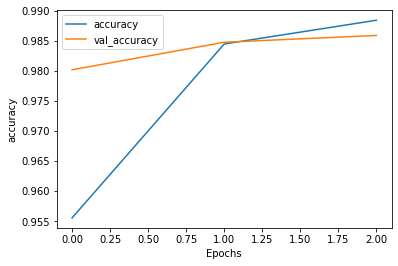

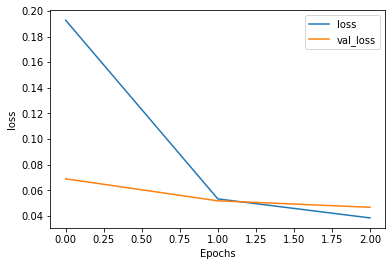

In [36]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss");

In [37]:
model.evaluate(x_test, np.array(y_test))

150/150 [==============================] - 3s 22ms/step - loss: 0.0488 - accuracy: 0.9856


[0.04875258356332779, 0.9855838418006897]

In [38]:
i = np.random.randint(0, x_test.shape[0])
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)

y_true = np.argmax(np.array(y_test), axis=-1)[i]

print('{:15}{:5}\t {}\n'.format('Word', 'True', 'Pred'))
print('-'*30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
    print('{:15}{}\t{}'.format(words[w-1], tags[true], tags[pred]))

Word           True 	 Pred

------------------------------
Delegates      O	O
from           O	O
57             O	O
Muslim         O	O
countries      O	O
will           O	O
discuss        O	O
the            O	O
challenges     O	O
and            O	O
dangers        O	O
of             O	O
Islamic        O	B-geo
extremism      O	O
when           O	O
they           O	O
meet           O	O
Wednesday      B-tim	B-tim
at             O	O
the            O	O
Organization   B-org	B-org
of             I-org	I-org
Islamic        I-org	I-org
Conference     I-org	I-org
summit         O	O
in             O	O
Saudi          B-geo	B-geo
Arabia         I-geo	I-geo
.              O	O
GEO            O	O
GEO            O	O
GEO            O	O
GEO            O	O
GEO            O	O
GEO            O	O
GEO            O	O
GEO            O	O
GEO            O	O
GEO            O	O
GEO            O	O
GEO            O	O
GEO            O	O
GEO            O	O
GEO            O	O
GEO            O	O
GEO            O	O
GEO    